In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.display.max_columns=60

The following codeblock is a systematic way to load data for all of the counties. Simply changing 'DIR' to a file path from your CWD to where all the unzipped county files will allow this to run on your computer. Since this is loading lots of data in, this block takes a while to run.

In [2]:
import os, os.path

DIR = 'data'  #this is a folder which has all the (unzipped) files for each county, downloaded from dropbox
counties = [name for name in os.listdir('data')]     #this is an array of all the files in DIR, each file is folder containing the files for a county
countyDFs = [] #this will be an array of dfs, each df corresponds to one county

print(counties[0][13:18]) #this is how to get the actual name of the county from the file

for county in counties:
    #each county file consists of many little files, each containing a few rows (I think?)
    #this reads all the names of those files, turns each into a df, adds it to L

    countyFiles = [name for name in os.listdir('data/' + county)]
    L = []
    for file in countyFiles:
        
        L.append(pd.read_parquet(DIR + '/' + county + '/' + file))

    #glue all the rows of this county into one big df and add it to our list of countyDFs
    countyDFs.append(pd.concat(L).reset_index())



0J6B5


In [13]:
#fix the formats of the date column in each county
for df in countyDFs:
    df['DateTime']=pd.to_datetime(df['eTimes_03'], format='%d%b%Y:%H:%M:%S',exact=False, errors='coerce')


countyDFs[1].head()

,__null_dask_index__,PcrKey,eDispatch_01,eDispatch_02,eArrest_14,eArrest_01,eArrest_02,eArrest_05,eArrest_07,eArrest_11,eArrest_16,eArrest_18,eDisposition_12,eDisposition_19,eDisposition_16,eDisposition_21,eDisposition_22,eDisposition_23,eOutcome_01,eOutcome_02,ePatient_13,ePatient_15,ePatient_16,ePayment_01,ePayment_50,eResponse_05,eResponse_07,eResponse_15,eResponse_23,eScene_01,eScene_06,eScene_07,eScene_08,eScene_09,eSituation_02,eSituation_07,eSituation_08,eSituation_13,eSituation_01,eTimes_01,eTimes_03,eTimes_05,eTimes_06,eTimes_07,eTimes_09,eTimes_11,eTimes_12,eTimes_13,eDisposition_17,year_x,Masked_DestinationCounty,year_y,Masked_DestinationState,DateTime,WeekNum,WeekDay
0,0,169609585.0,2301071,2302007,Not Applicable,3001001,7701001,7701001,7701001,7701001,7701001,7701001,4212033,4219005,4216005,4221013,7701001,7701001,7701001,7701001,9906003,53.0,2516009,2601021,2650001,2205005,2207003,2215013,2223001,9923003,2707005,7701001,7701001,Y92.23,7701001,2807015,2808001,2813005,Not Applicable,Not Applicable,01JAN2022:06:58:10,01JAN2022:07:01:38,01JAN2022:07:12:35,01JAN2022:07:18:35,01JAN2022:07:23:24,01JAN2022:07:40:11,01JAN2022:07:50:43,01JAN2022:07:54:15,4217005,2022,0JTMM,2022,AOILO,2022-01-01 06:58:10,52,5
1,1,169609607.0,2301061,2302001,Not Applicable,3001001,7701001,7701001,7701001,7701001,7701001,7701001,4212033,4219005,4216005,4221003,7701001,9908007,7701003,7701003,9906001,77.0,2516009,7701003,7701003,2205001,2207003,2215013,2223001,7701003,2707005,9923001,7701003,Y92.0,9922001,2807011,2808011,2813005,02JAN2022:12:41:40,02JAN2022:12:41:10,02JAN2022:12:41:40,02JAN2022:12:44:01,02JAN2022:12:54:10,02JAN2022:12:55:00,02JAN2022:13:03:14,02JAN2022:13:21:23,02JAN2022:13:30:26,02JAN2022:13:40:26,4217005,2022,0JTMM,2022,AOILO,2022-01-02 12:41:40,52,6
2,2,169609609.0,2301059,2302007,Not Applicable,3001001,7701001,7701001,7701001,7701001,7701001,7701001,4212033,4219005,4216005,4221003,7701001,9908007,7701003,7701001,9906001,24.0,2516009,2601021,2650003,2205001,2207003,2215013,2223001,9923001,2707005,9923001,7701001,Y92.48,9922001,2807011,2808001,2813005,Not Applicable,01JAN2022:01:20:28,01JAN2022:01:21:36,01JAN2022:01:24:13,01JAN2022:01:30:24,01JAN2022:01:33:24,01JAN2022:01:46:40,01JAN2022:01:56:48,01JAN2022:02:11:36,01JAN2022:02:18:13,4217005,2022,0JTMM,2022,AOILO,2022-01-01 01:21:36,52,5
3,3,169609637.0,2301061,2302001,Not Applicable,3001001,7701001,7701001,7701001,7701001,7701001,7701001,4212033,4219003,4216005,4221003,7701001,7701003,7701003,7701003,9906003,84.0,2516009,7701003,7701003,2205001,2207003,2215013,2223001,7701003,2707005,9923001,7701003,Y92.0,9922001,2807011,2808011,2813003,01JAN2022:01:00:00,01JAN2022:00:43:00,01JAN2022:00:44:00,01JAN2022:00:47:00,01JAN2022:01:00:00,01JAN2022:01:02:00,01JAN2022:01:09:00,01JAN2022:01:32:00,01JAN2022:01:39:00,01JAN2022:01:54:00,4217005,2022,0JTMM,2022,AOILO,2022-01-01 00:44:00,52,5
4,4,169609665.0,2301051,7701003,Not Applicable,3001001,7701001,7701001,7701001,7701001,7701001,7701001,4212033,4219005,4216005,4221003,7701001,7701003,7701003,7701003,9906003,62.0,2516009,7701003,7701003,2205005,2207003,2215013,2223005,7701003,2707005,9923001,7701003,Y92.23,9922001,2807013,2808017,2813005,01JAN2022:22:48:00,01JAN2022:22:48:00,01JAN2022:22:48:00,01JAN2022:22:53:00,01JAN2022:22:57:00,01JAN2022:22:59:00,01JAN2022:23:11:00,01JAN2022:23:47:00,01JAN2022:23:59:00,02JAN2022:00:20:00,4217005,2022,0JTMM,2022,AOILO,2022-01-01 22:48:00,52,5


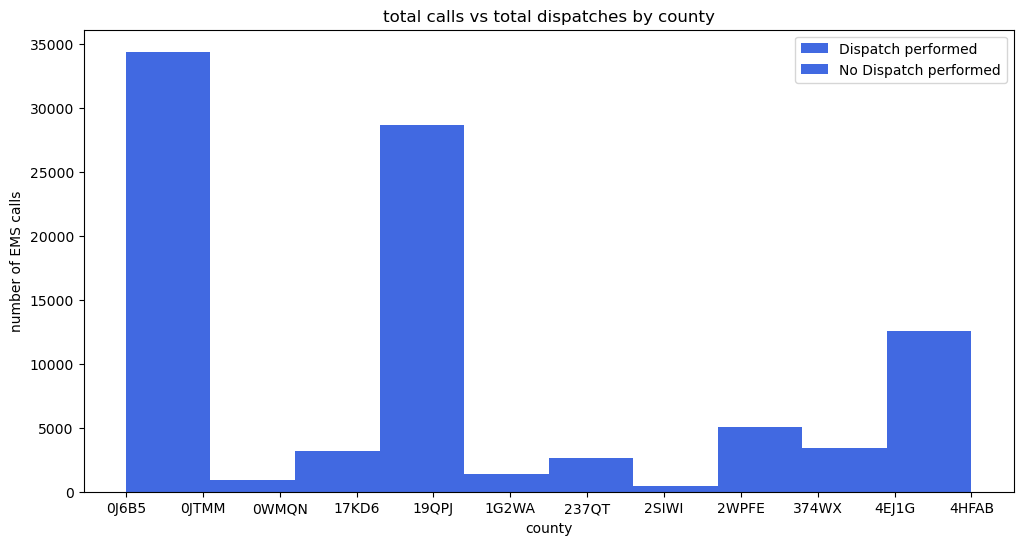

In [38]:
#It would appear that the pink and blue don't mean anything, and rather that these columns simply represent the total number of calls in each county.

xi_calls = []
xi_nodispatch = []

for county in countyDFs:
    xi_calls.append(county.loc[(county.eDispatch_02!='2302001'),'Masked_DestinationCounty'])
    xi_nodispatch.append(county.loc[(county.eDispatch_02=='2302001'),'Masked_DestinationCounty'])

xi_calls = pd.concat(xi_calls)
xi_nodispatch = pd.concat(xi_nodispatch)

colors=['royalblue','royalblue']
plt.figure(figsize=(12,6))
plt.title("total calls vs total dispatches by county")
plt.ylabel('number of EMS calls')
plt.xlabel('county')
plt.hist([xi_calls,xi_nodispatch], histtype='bar', stacked=True, color=colors)
plt.legend()
plt.show()

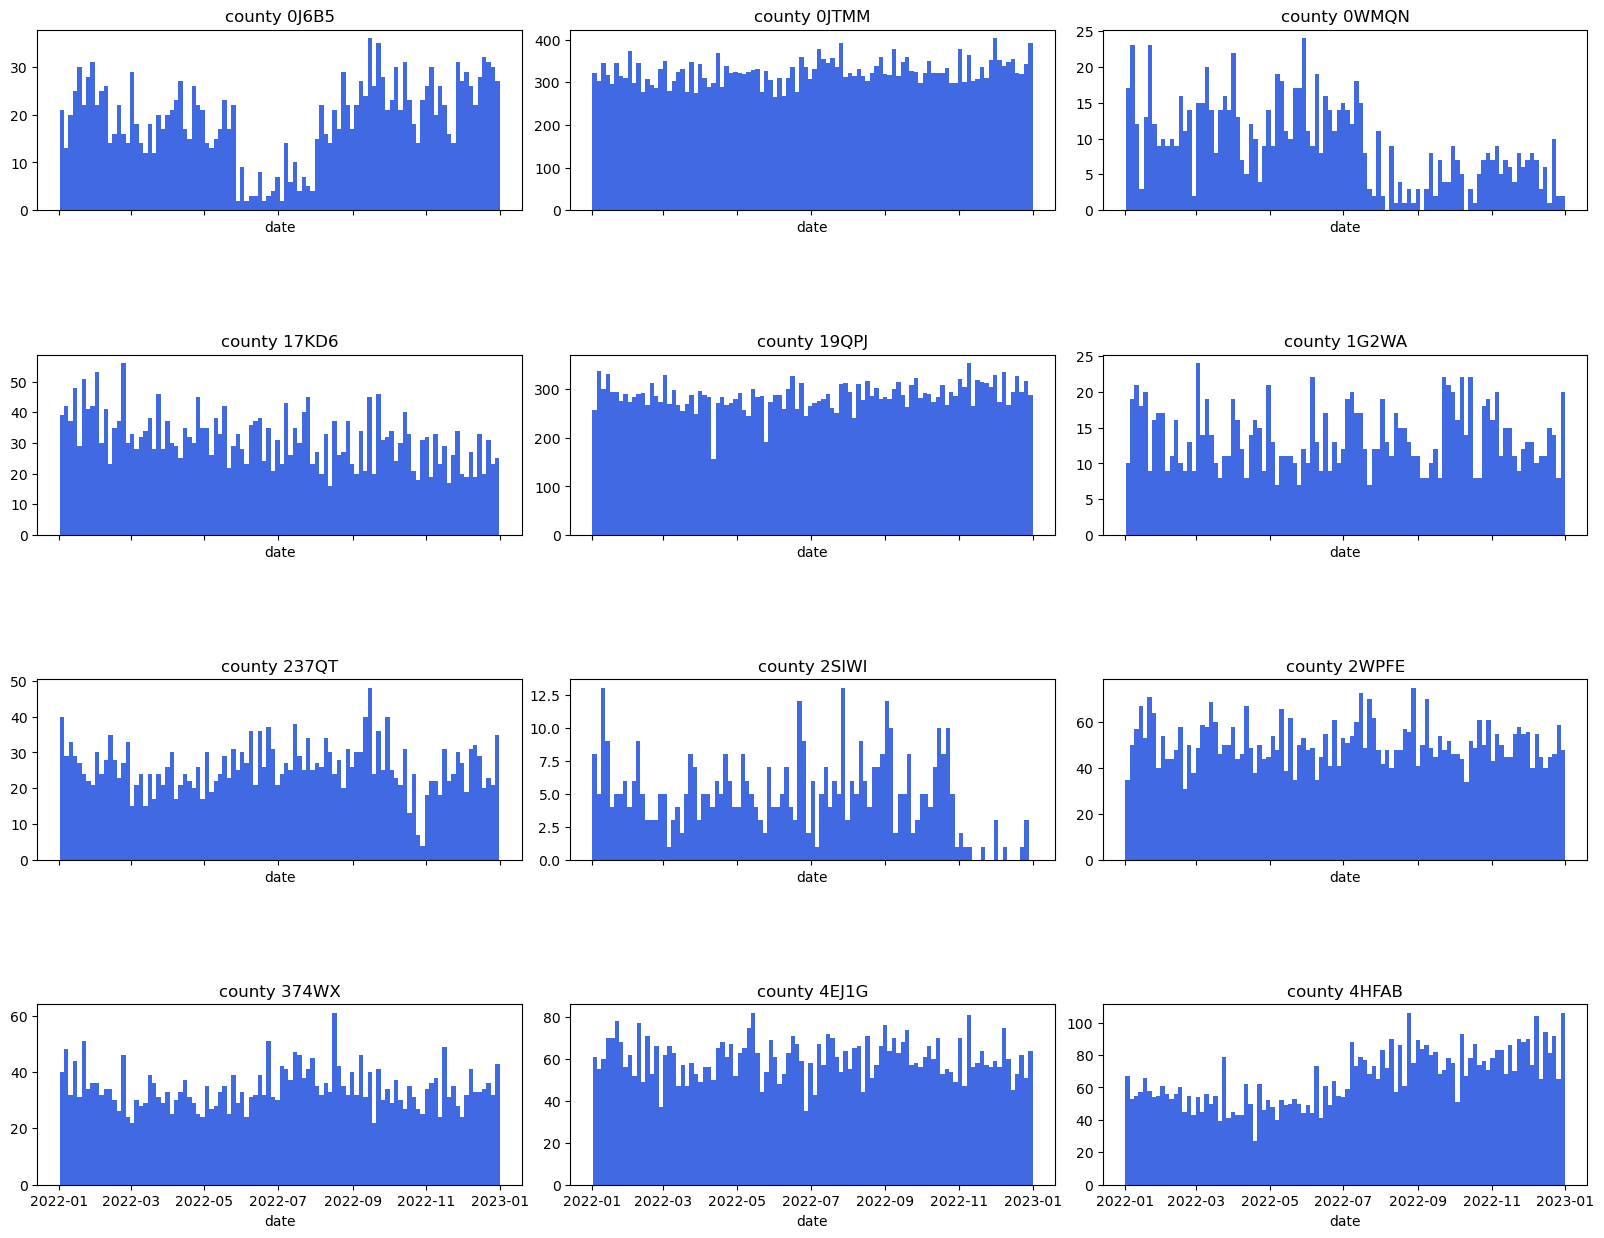

In [5]:
#This repeats Karina's graph of calls over the year for each county


fig, axs = plt.subplots((len(countyDFs))//3,3,sharex=True,figsize = (20,15))
plt.subplots_adjust(wspace=0.10, hspace=.8)
colors=['royalblue','royalblue']


yearlyCycles = []

for df in countyDFs:
    x1=df.loc[(df.eDispatch_02!='2302001'),'DateTime']
    x2=df.loc[(df.eDispatch_02=='2302001'),'DateTime'] #eDispatch_02=='2302001' means no EM Dispatch was performed
    yearlyCycles.append([x1,x2])


for i in range(len(yearlyCycles)):

    #this x and y are the coordinate of which graph it should be
    x = (i//3)
    y = i%3
    
    axs[x,y].hist(yearlyCycles[i],bins = 100, histtype = 'bar', stacked = True, color = colors)
    axs[x,y].set_xlabel('date')
    axs[x,y].set_title('county ' + counties[i][13:18])


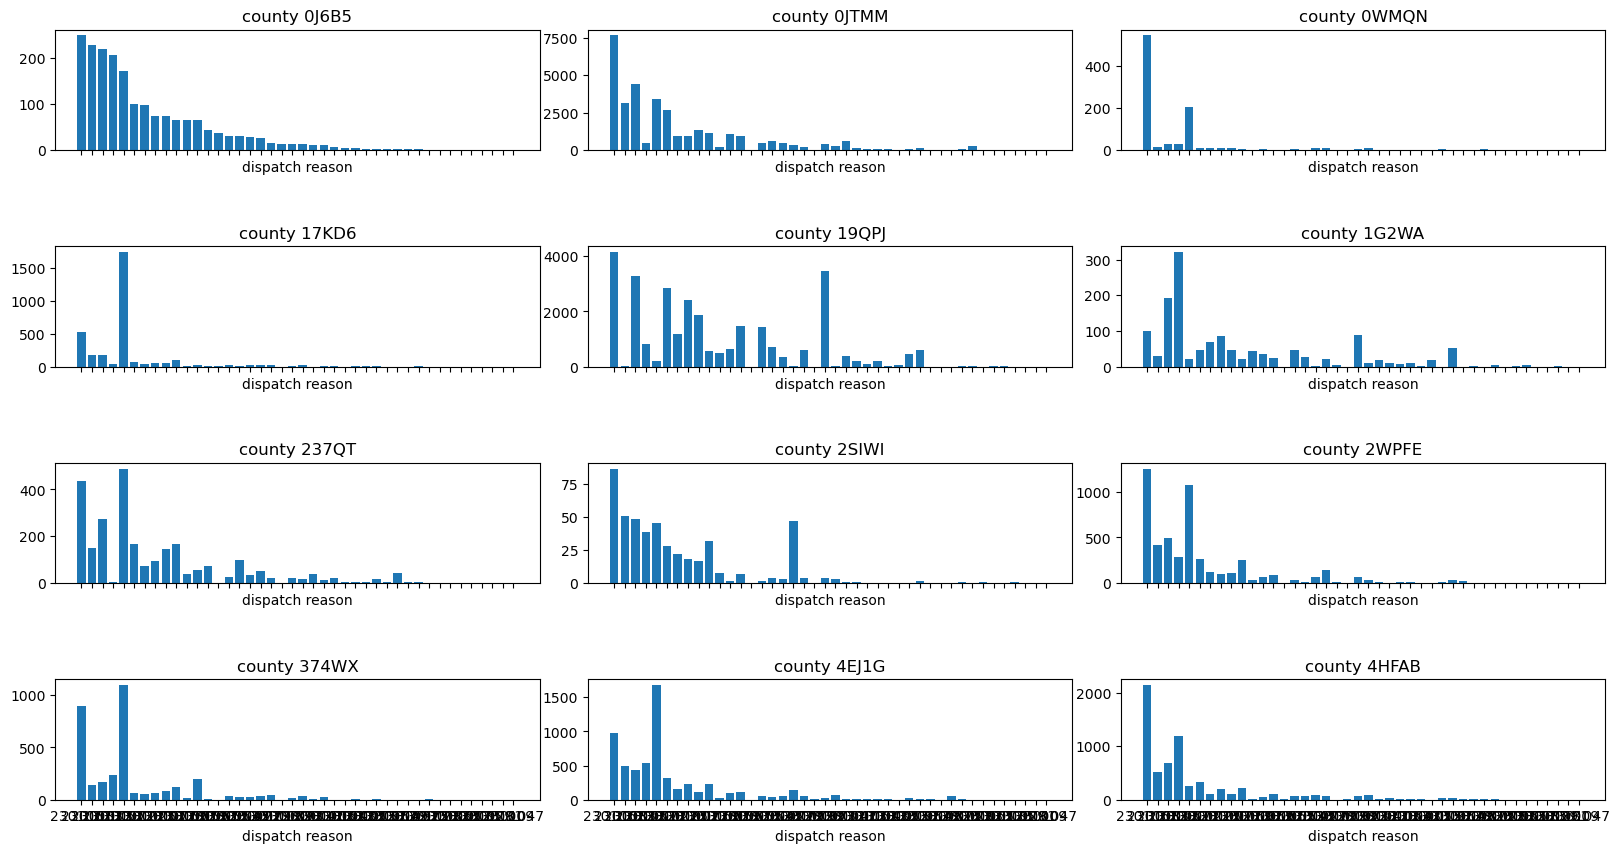

In [6]:
#this repeats the bar chart of call reason/number of calls, but compares different counties
#We can see counties are all quite different
#Note that the y coordinate is not the same for each chart since counties vary widely in total number of calls


fig, axs = plt.subplots((len(countyDFs))//3,3,sharex=True,figsize = (20,10))
plt.subplots_adjust(wspace=0.10, hspace=.8)

countyCounts = []

for county in countyDFs:
    countyCounts.append(county['eDispatch_01'].value_counts())

for i in range(len(countyCounts)):
    x = (i//3)
    y = i%3
    #print(x,y)
    axs[x,y].bar(countyCounts[i].index,countyCounts[i].values)
    axs[x,y].set_xlabel('dispatch reason')
    axs[x,y].set_title('county ' + counties[i][13:18])


In [31]:
paymentDict = { 
    2601001: 'Insurance',
    2601003: 'Medicaid',
    2601005: 'Medicare',
    2601007: 'Not Billed (for any reason)',
    2601009: 'Other Government',
    2601011: 'Self Pay',
    2601013: 'Workers Compensation',
    2601015: 'Payment by Facility',
    2601017: 'Contracted Payment',
    2601019: 'Community Network',
    2601021: 'No Insurance Identified',
    2601023: 'Other Payment Option',
    7701003: 'Not Recorded',
    7701001: 'Not Applicable'
}

paymentDict[7701003]

'Not Recorded'

No Insurance Identified        9651
Not Recorded                   9294
Insurance                      6412
Medicare                       3763
Self Pay                       1728
Medicaid                       1490
Other Government                 97
Not Applicable                   31
Payment by Facility              20
Other Payment Option             11
Workers Compensation             10
Contracted Payment                4
Not Billed (for any reason)       1
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_19784\1506894747.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[x,y].set_xticklabels(countyCounts[i].index, rotation = 90)
C:\Users\User\AppData\Local\Temp\ipykernel_19784\1506894747.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[x,y].set_xticklabels(countyCounts[i].index, rotation = 90)
C:\Users\User\AppData\Local\Temp\ipykernel_19784\1506894747.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[x,y].set_xticklabels(countyCounts[i].index, rotation = 90)
C:\Users\User\AppData\Local\Temp\ipykernel_19784\1506894747.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[x,y].set_xticklabel

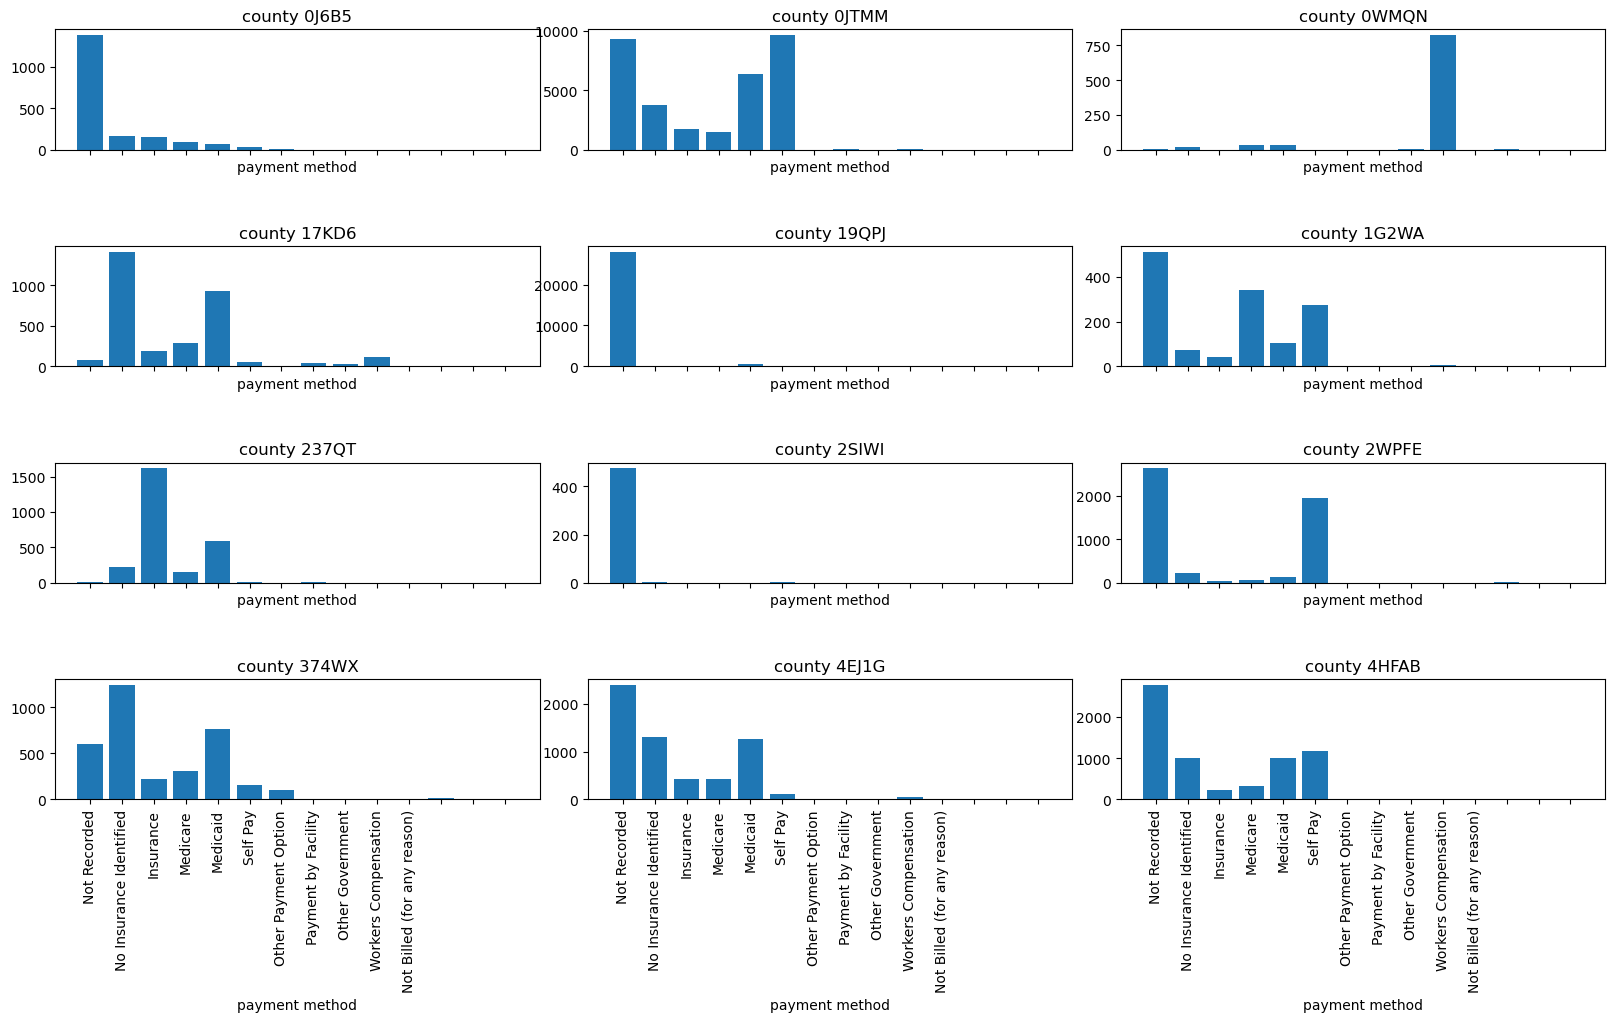

In [37]:
#Same as above, but payment methods across different counties.
#By far the most commmon across all counties is not recorded or no insurance identified, which is to say most of this data is useless

fig, axs = plt.subplots((len(countyDFs))//3,3,sharex=True,figsize = (20,10))
plt.subplots_adjust(wspace=0.10, hspace=.8)

countyCounts = []

for county in countyDFs:
    countyCounts.append(county['ePayment_01'].value_counts())

j = 0
for county in countyCounts:
    paymentTypes = [paymentDict[int(code)] for code in county.index]
    countyCounts[j] = pd.Series(county.values,paymentTypes)
    j += 1

for i in range(len(countyCounts)):
    x = (i//3)
    y = i%3
    #print(x,y)
    axs[x,y].bar(countyCounts[i].index,countyCounts[i].values)
    axs[x,y].set_xlabel('payment method')
    axs[x,y].set_xticklabels(countyCounts[i].index, rotation = 90)
    axs[x,y].set_title('county ' + counties[i][13:18])


Most common reasons:
Sick Person, Breathing Problem, Transfer/Interfacility/Palliative Care, Falls, Chest Pain (Non-Traumatic)

In [7]:
# Plotting trends over each Week
#create new columns for WeekNum and WeekDay
for county in countyDFs:
    county['WeekNum']=county.DateTime.apply(lambda x: x.isocalendar().week)
    county['WeekDay']=county.DateTime.dt.dayofweek

countyDFs[0].head()

,__null_dask_index__,PcrKey,eDispatch_01,eDispatch_02,eArrest_14,eArrest_01,eArrest_02,eArrest_05,eArrest_07,eArrest_11,eArrest_16,eArrest_18,eDisposition_12,eDisposition_19,eDisposition_16,eDisposition_21,eDisposition_22,eDisposition_23,eOutcome_01,eOutcome_02,ePatient_13,ePatient_15,ePatient_16,ePayment_01,ePayment_50,eResponse_05,eResponse_07,eResponse_15,eResponse_23,eScene_01,eScene_06,eScene_07,eScene_08,eScene_09,eSituation_02,eSituation_07,eSituation_08,eSituation_13,eSituation_01,eTimes_01,eTimes_03,eTimes_05,eTimes_06,eTimes_07,eTimes_09,eTimes_11,eTimes_12,eTimes_13,eDisposition_17,year_x,Masked_DestinationCounty,year_y,Masked_DestinationState,DateTime,WeekNum,WeekDay
0,0,169609817.0,2301071,2302007,Not Recorded,3001001,7701003,7701003,7701003,7701003,7701003,7701003,4212033,4219005,4216005,4221011,7701003,7701003,7701003,7701003,9906001,88.0,2516009,2601011,2650007,2205005,2207003,2215003,2223005,9923003,2707005,9923001,7701003,Y92.23,9922001,2807011,2808021,2813005,01JAN2022:17:00:00,01JAN2022:17:01:30,01JAN2022:17:02:37,01JAN2022:17:04:59,01JAN2022:17:12:20,01JAN2022:17:13:00,01JAN2022:17:22:30,01JAN2022:17:49:22,01JAN2022:17:55:00,01JAN2022:18:20:00,4217005,2022,0J6B5,2022,E3XQM,2022-01-01 17:02:37,52,5
1,1,169839596.0,2301025,2302001,Not Recorded,7701003,7701003,7701003,7701003,7701003,7701003,7701003,4212033,4219005,4216005,4221005,7701003,7701003,7701003,7701003,9906003,34.0,2516009,7701003,2650001,2205001,2207003,2215013,2223005,9923003,2707005,9923001,7701003,Y92.414,9922001,2807011,2808005,2813005,Not Recorded,Not Recorded,01JAN2022:00:22:16,01JAN2022:00:26:43,01JAN2022:00:34:23,01JAN2022:00:35:00,01JAN2022:00:55:09,01JAN2022:01:04:18,01JAN2022:01:18:55,01JAN2022:01:28:59,4217001,2022,0J6B5,2022,E3XQM,2022-01-01 00:22:16,52,5
2,0,171328317.0,2301033,2302001,Not Recorded,7701003,7701003,7701003,7701003,7701003,7701003,7701003,4212033,4219005,4216005,4221005,7701003,7701003,7701003,7701003,9906003,74.0,2516009,7701003,7701003,2205001,2207003,2215013,2223001,9923003,2707005,9923001,7701003,Y92.12,9922005,2807015,2808015,2813003,Not Recorded,Not Recorded,11JAN2022:04:11:22,11JAN2022:04:21:08,11JAN2022:04:43:34,11JAN2022:04:44:00,11JAN2022:04:49:45,11JAN2022:05:00:08,11JAN2022:05:01:00,11JAN2022:05:30:40,4217005,2022,0J6B5,2022,E3XQM,2022-01-11 04:11:22,2,1
3,1,171328347.0,2301061,2302001,Not Recorded,7701003,7701003,7701003,7701003,7701003,7701003,7701003,4212033,4219001,4216005,4221003,7701003,7701003,09,7701003,9906003,65.0,2516009,7701003,7701003,2205001,2207003,2215013,2223001,9923003,2707005,9923001,7701003,Y92.01,9922001,2807011,2808005,2813001,Not Recorded,Not Recorded,10JAN2022:10:16:36,10JAN2022:10:16:38,10JAN2022:10:21:45,10JAN2022:10:22:00,10JAN2022:10:39:20,10JAN2022:10:47:32,10JAN2022:10:48:00,10JAN2022:11:46:20,4217001,2022,0J6B5,2022,E3XQM,2022-01-10 10:16:36,2,0
4,2,171328647.0,2301001,7701003,Not Recorded,3001001,7701003,7701003,7701003,7701003,7701003,7701003,4212033,4219003,4216005,4221003,4222035,9908007,7701003,7701003,9906003,30.0,2516009,2601005,7701003,2205001,2207003,2215013,2223001,9923003,2707005,9923001,7701003,7701003,9922001,2807001,2808011,2813003,02JAN2022:20:00:20,03JAN2022:19:25:00,03JAN2022:19:29:00,03JAN2022:19:30:00,03JAN2022:19:34:00,03JAN2022:19:35:00,03JAN2022:19:45:00,03JAN2022:20:05:00,03JAN2022:20:40:00,03JAN2022:20:46:00,4217001,2022,0J6B5,2022,E3XQM,2022-01-03 19:29:00,1,0


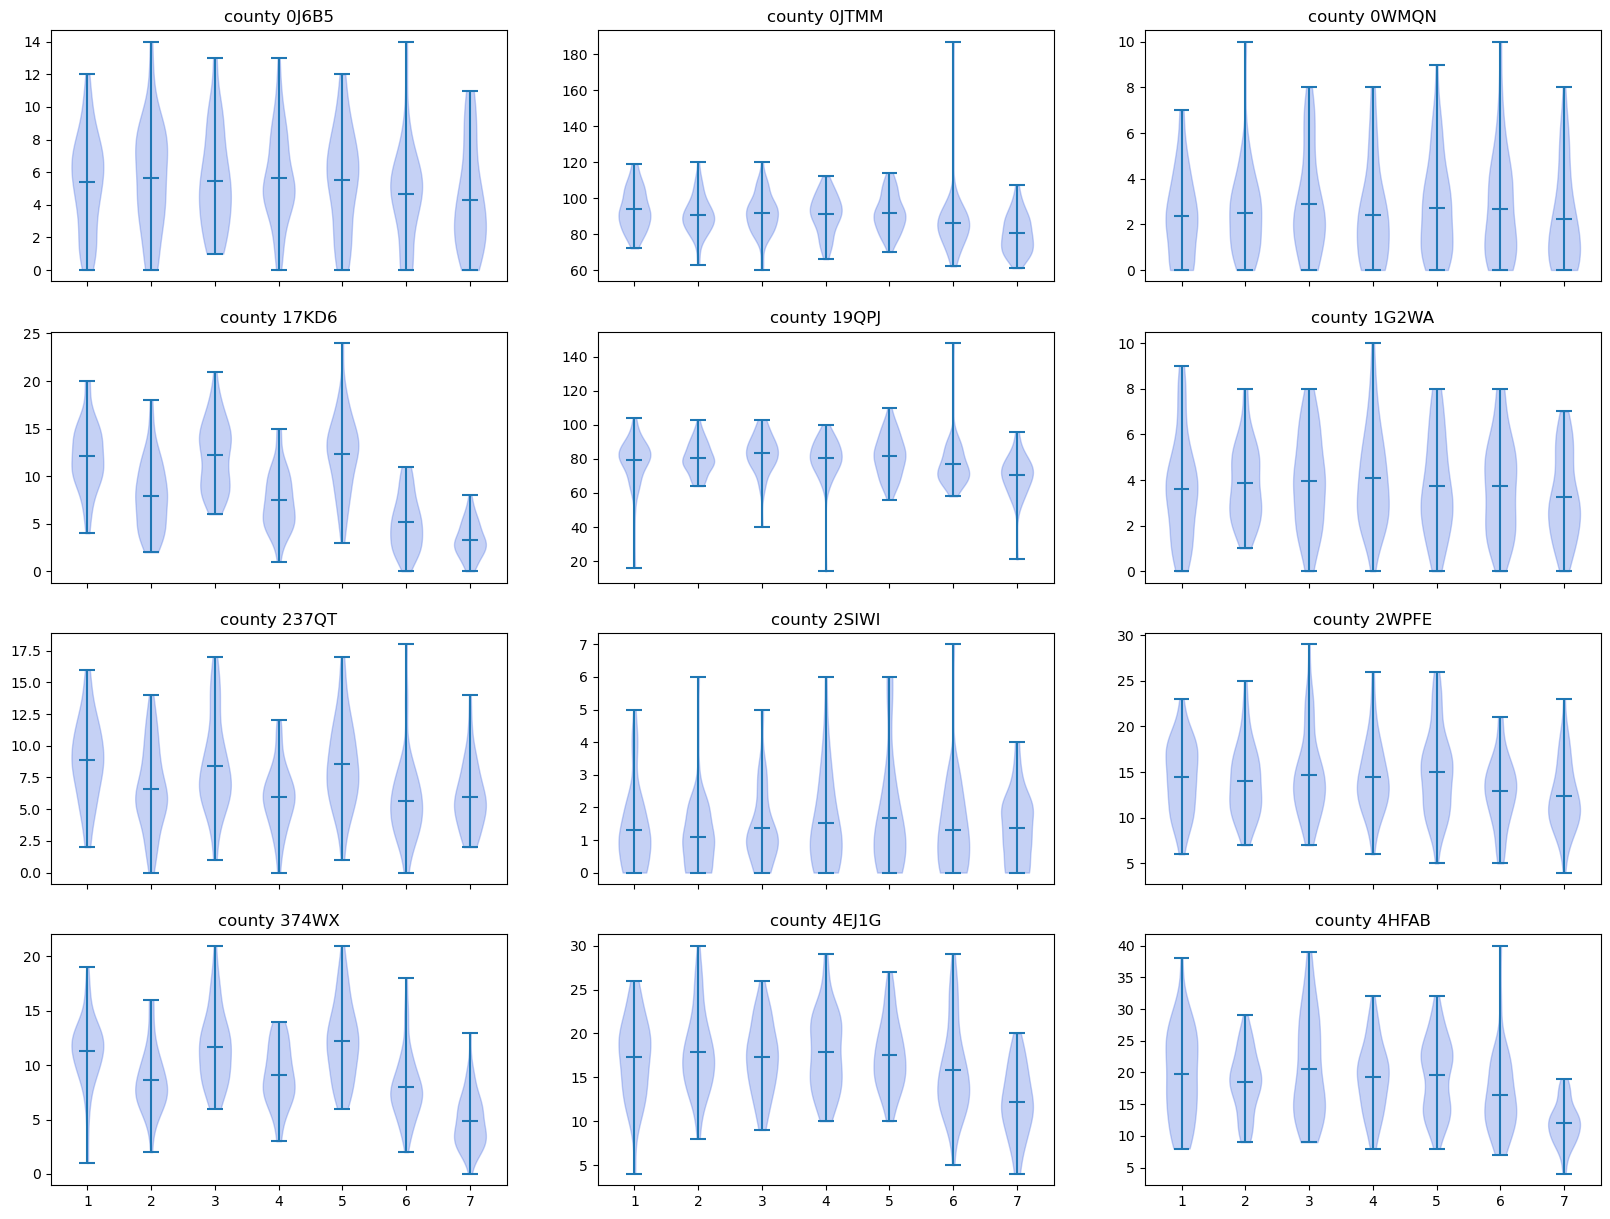

In [9]:
fig, axs = plt.subplots((len(countyDFs))//3,3,sharex=True,figsize = (20,15))
stupid = [0,1,2,3,4,5,6] #why doesn't range(6) = stupid? i don't know


for i in range(len(countyDFs)):
    xcoord = i//3
    ycoord = i%3
    county = countyDFs[i]
    df_w=countyDFs[i].groupby(by='WeekNum').WeekDay.value_counts().unstack() #number of calls each day of the week, one row for each week of the year    
    data = [df_w[weekday].tolist() for weekday in [0,1,2,3,4,5,6]]

    for j in stupid:
        data[j] = [number if number == number else 0 for number in data[j]]    
    #some counties are missing a day here and there, and that will stop the calculation of stuff for the plot, this is a tricky thing that replaces nans with 0s
    

    #axs[xcoord,ycoord].vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)    
    parts = axs[xcoord,ycoord].violinplot(data, showmeans = True)
    axs[xcoord,ycoord].set_title('county ' + counties[i][13:18])

    for pc in parts['bodies']:
        pc.set_facecolor('royalblue')
        pc.set_edgecolor('royalblue')






In [10]:
#For the remainder of this, we focus on county 0jtmm, simply because it is large
choice = 5
countyCode = counties[choice][13:18]
county = countyDFs[choice]


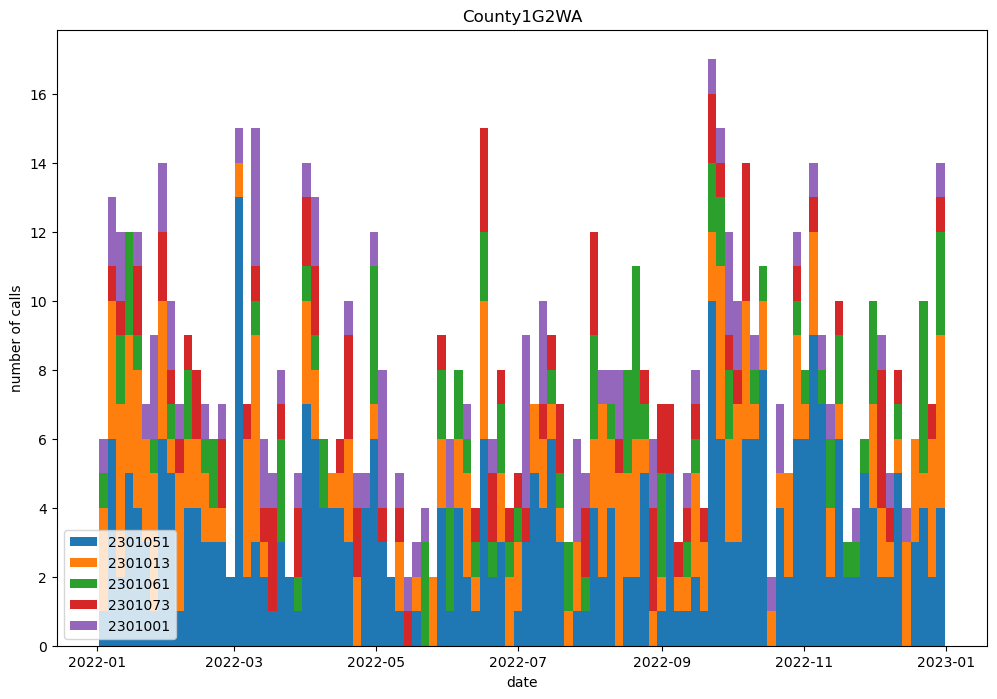

In [11]:
beep = []
labels = []
numTypes = 5

codes = county['eDispatch_01'].value_counts().index 
counts = county['eDispatch_01'].value_counts().to_list() #actually not sure we need this

for i in range(numTypes):
    beep.append(county.loc[(county.eDispatch_01 == codes[i]), 'DateTime'])    
    labels.append(codes[i])


plt.figure(figsize=(12,8))
plt.title("County" + countyCode)
plt.ylabel('number of calls')
plt.xlabel('date')
plt.hist(beep, bins=100, histtype='bar', stacked=True, label=labels)
plt.legend(loc='lower left')
plt.show()



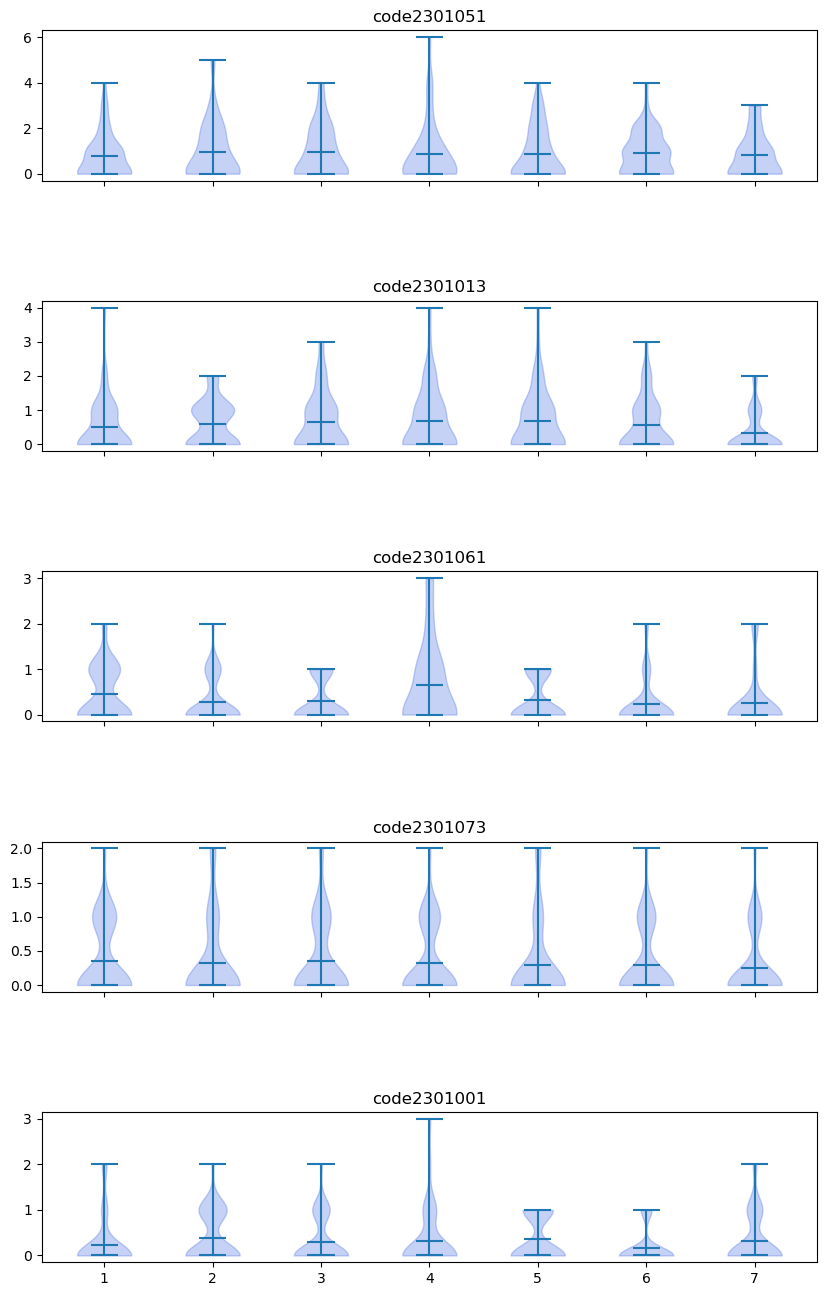

In [12]:
#Repeat this analysis but at the week level
#one violinplot for each call type up to numtypes
fig, axs = plt.subplots(numTypes,sharex=True,figsize = (10,16))

plt.subplots_adjust(wspace=0.25, hspace=.8)
beep = []

for i in range(numTypes):
    #build a violinplot for this type of call

    df_w=county.loc[county.eDispatch_01 == codes[i]].groupby(by='WeekNum').WeekDay.value_counts().unstack() #number of calls each day of the week, one row for each week of the year    
    data = [df_w[weekday].tolist() for weekday in [0,1,2,3,4,5,6]]


    for j in stupid:
        data[j] = [number if number == number else 0 for number in data[j]]  

    parts = axs[i].violinplot(data, showmeans = True)
    axs[i].set_title('code' + str(codes[i]))
    for pc in parts['bodies']:
        pc.set_facecolor('royalblue')
        pc.set_edgecolor('royalblue')

